## Austin Reed

### Homework 4

Integrate the nonlinear equation forward in time under the conditions given below and observed the development of nonlinear computational instability

The domain is continuous in x of length unity, and there are 20 intervals. Use centered differences in both space and time (forward in time initially) and let delta_t=delta_x/10

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Cases

a) u(x,0) = 1+ sin(2pix) (one wave superimposed on a mean part)

Run to 100 time steps, print u at every 5 time steps and plot u initially and finally to show the development of instability

In [3]:
x=np.linspace(0,1,20)
u_0=1+np.sin(2*np.pi*x)
u_0

array([1.        , 1.32469947, 1.61421271, 1.83716648, 1.96940027,
       1.99658449, 1.91577333, 1.73572391, 1.47594739, 1.16459459,
       0.83540541, 0.52405261, 0.26427609, 0.08422667, 0.00341551,
       0.03059973, 0.16283352, 0.38578729, 0.67530053, 1.        ])

In [4]:
len(u_0)

20

Text(0, 0.5, 'Amplitude')

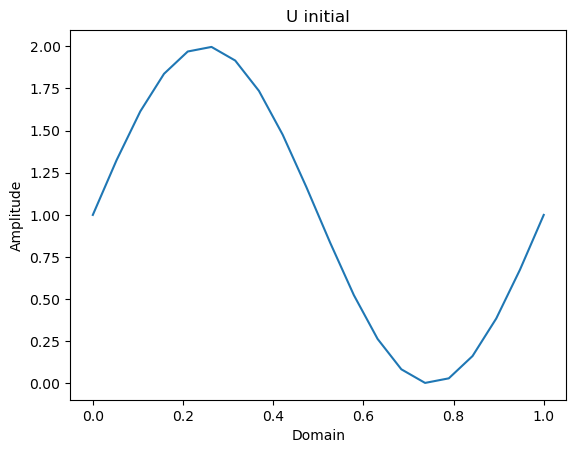

In [5]:
plt.plot(x,u_0)
plt.title('U initial')
plt.xlabel('Domain')
plt.ylabel('Amplitude')

In [6]:
ntotal=100 #final time step
delta_x=1/20
delta_t=delta_x/10 
#c=1
nx =20 #number of grid points
mu=0.1 #CFL condition, c*delta_t/delta_x

In [7]:
# Initialize array to store results for each iteration
u_results = np.zeros((ntotal, nx))  # Array to store results for each timestep
for n in range(ntotal):
    if n==0:
        u=np.copy(u_0)
    # Initialize u_next for the current iteration
    u_next = np.zeros_like(u_0)        
    for i in range(1, nx - 1):
        # Compute spatial differences using central differences
        d_q_dx = (u[i + 1] - u[i - 1]) / (2 * delta_x)
        # Update u_next for the next time step
        u_next[i] = u[i] - delta_t * u[i] * d_q_dx #need to multiply by u and not c!
        # Apply boundary conditions
    u_next[0] = u[0]  # Left boundary
    u_next[-1] = u[-1]  # Right boundary
    u = np.copy(u_next)
    u_results[n, :] = u

In [8]:
print(u_0)

[1.         1.32469947 1.61421271 1.83716648 1.96940027 1.99658449
 1.91577333 1.73572391 1.47594739 1.16459459 0.83540541 0.52405261
 0.26427609 0.08422667 0.00341551 0.03059973 0.16283352 0.38578729
 0.67530053 1.        ]


In [9]:
print(len(u_results))

100


In [10]:
#the instability can be seen here by changes in the amplitudes of u
for i in range(0,len(u_results),5):
    print(u_results[i])

[1.         1.28401711 1.57285117 1.80453954 1.95370237 2.00193803
 1.94076081 1.77389473 1.51809523 1.20189318 0.86216102 0.5390177
 0.27008786 0.08532524 0.00342467 0.03035583 0.1599417  0.37590212
 0.65456162 1.        ]
[1.         1.13332977 1.38002877 1.62453222 1.82877775 1.96759587
 2.01469165 1.9447074  1.7432296  1.42174176 1.02693715 0.63102004
 0.30450367 0.09145894 0.00347443 0.02922559 0.14723114 0.33463459
 0.55609069 1.        ]
[1.         1.04658845 1.22894632 1.45043481 1.66484543 1.8494376
 1.98262815 2.03310812 1.95381394 1.69555518 1.26362991 0.76633816
 0.35182662 0.09897973 0.00353172 0.0282212  0.13676035 0.30425588
 0.46797937 1.        ]
[1.         0.99966733 1.12097169 1.30542256 1.5051095  1.69698191
 1.8666833  1.99851913 2.06240358 1.97486515 1.60026984 0.9808883
 0.42201085 0.10858367 0.00359822 0.027319   0.12787513 0.28187959
 0.39108697 1.        ]
[1.         0.97755728 1.04771228 1.19241183 1.36785616 1.54912298
 1.72301596 1.87916533 2.01287824 2.

In [189]:
legend_labels=np.arange(0,100,5)

Text(0, 0.5, 'Amplitude')

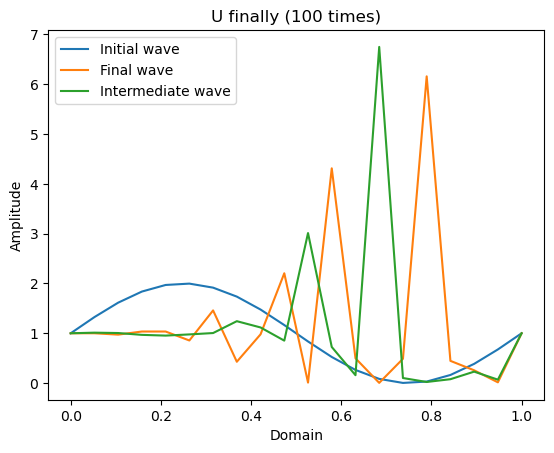

In [21]:
plt.plot(x,u_0)
plt.plot(x,u_next)
plt.plot(x,u_results[60])
plt.legend(['Initial wave', 'Final wave','Intermediate wave'])
plt.title('U finally (100 times)')
plt.xlabel('Domain')
plt.ylabel('Amplitude')

We see here that from the initial wave to the final wave that the instability starts to develop near the end of the domain and that the solution grows in amplitude; and the instability development is quick after reaching a certain time step (by timestep 20 we see it start to grow at 0.4 in the domain, and by timestep 60 it is quite unstable). In the beginning of the iterations, it takes a while for the instability to develop.

### b) Repeat (a) with delta_t=delta_x/100. Run to 500 time steps (see note below) and compare results with (a) to verify that reducing delta_t does not control nonlinear instability. You may wish to continue this further, let delta_t=delta_x/1000 and go out to 5000 time steps.

You have to increase the # of time steps when you reduce delta_t in order to integrate out to the same final time

In [22]:
ntotal=500 #final time step
delta_x=1/20
delta_t=delta_x/100
nx =20 #number of grid points

In [23]:
x=np.linspace(0,1,20)
u_0=1+np.sin(2*np.pi*x) #re-initialize u_0

In [24]:
# Initialize array to store results for each iteration
u_results = np.zeros((ntotal, nx))  # Array to store results for each timestep
for n in range(ntotal):
    if n==0:
        u=np.copy(u_0)
    # Initialize u_next for the current iteration
    u_next = np.zeros_like(u_0)        
    for i in range(1, nx - 1):
        # Compute spatial differences using central differences
        d_q_dx = (u[i + 1] - u[i - 1]) / (2 * delta_x)
        # Update u_next for the next time step
        u_next[i] = u[i] - delta_t * u[i] * d_q_dx #need to multiply by u and not c!
        # Apply boundary conditions
    u_next[0] = u[0]  # Left boundary
    u_next[-1] = u[-1]  # Right boundary
    u = np.copy(u_next)
    u_results[n,:]= u

Text(0, 0.5, 'Amplitude')

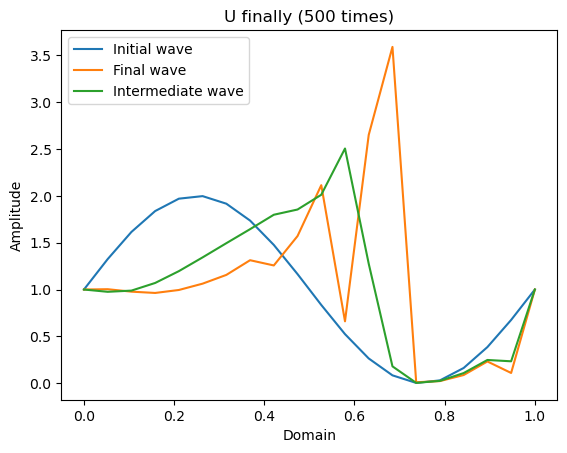

In [27]:
plt.plot(x,u_0)
plt.plot(x,u_next)
plt.plot(x,u_results[300])
plt.legend(['Initial wave', 'Final wave','Intermediate wave'])
plt.title('U finally (500 times)')
plt.xlabel('Domain')
plt.ylabel('Amplitude')

The instability takes a bit longer here to develop than the previous iteration, starting to grow by timestep 300.

In [129]:
for i in range(0,len(u_results),25):
    print(u_results[i])

[1.         1.32063123 1.61007656 1.83390378 1.96783048 1.99711985
 1.91827208 1.73954099 1.48016218 1.16832445 0.83808097 0.52554912
 0.26485727 0.08433653 0.00341642 0.03057534 0.16254434 0.38479877
 0.67322664 1.        ]
[1.         1.23105251 1.50910912 1.74780721 1.91775532 1.99721284
 1.97047185 1.83163372 1.58912834 1.26859302 0.91124795 0.56641615
 0.28047555 0.08721581 0.00344016 0.02998551 0.15571199 0.36193393
 0.62244242 1.        ]
[1.         1.16165502 1.41608024 1.65765396 1.8511238  1.97251392
 1.99920118 1.91185306 1.70189305 1.38289265 0.99853989 0.61526688
 0.29855615 0.09038191 0.00346562 0.02943107 0.14955417 0.34227582
 0.57395507 1.        ]
[1.         1.10833502 1.33353317 1.56896387 1.77463509 1.92678002
 2.00155526 1.97187015 1.81140033 1.51059406 1.10339158 0.6746781
 0.31980312 0.09389125 0.00349295 0.02890822 0.14395968 0.32536821
 0.52803139 1.        ]
[1.         1.06773865 1.26203299 1.48530613 1.69429364 1.86597489
 1.97875713 2.00501615 1.90755897 

We can see here that non-linear instability is still present near the end of the wave which is not controlled by reducing delta t.

In [28]:
ntotal=5000 #final time step
delta_x=1/20
delta_t=delta_x/1000
nx =20 #number of grid points

In [29]:
x=np.linspace(0,1,20)
u_0=1+np.sin(2*np.pi*x) #re-initialize u_0

In [30]:
# Initialize array to store results for each iteration
u_results = np.zeros((ntotal, nx))  # Array to store results for each timestep
for n in range(ntotal):
    if n==0:
        u=np.copy(u_0)
    # Initialize u_next for the current iteration
    u_next = np.zeros_like(u_0)        
    for i in range(1, nx - 1):
        # Compute spatial differences using central differences
        d_q_dx = (u[i + 1] - u[i - 1]) / (2 * delta_x)
        # Update u_next for the next time step
        u_next[i] = u[i] - delta_t * u[i] * d_q_dx #need to multiply by u and not c!
        # Apply boundary conditions
    u_next[0] = u[0]  # Left boundary
    u_next[-1] = u[-1]  # Right boundary
    u = np.copy(u_next)
    u_results[n,:]= u

Text(0, 0.5, 'Amplitude')

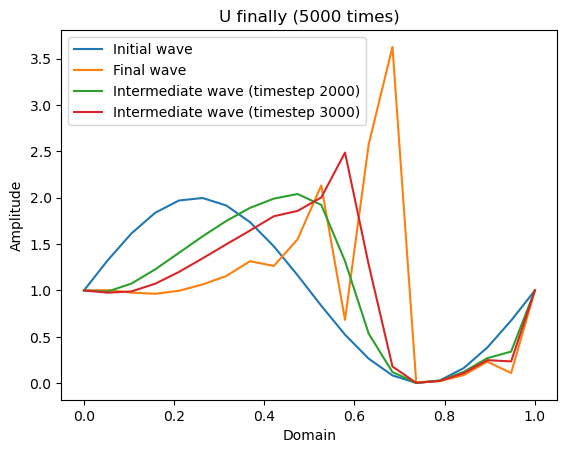

In [34]:
plt.plot(x,u_0)
plt.plot(x,u_next)
plt.plot(x,u_results[2000])
plt.plot(x,u_results[3000])
plt.legend(['Initial wave', 'Final wave','Intermediate wave (timestep 2000)','Intermediate wave (timestep 3000)'])
plt.title('U finally (5000 times)')
plt.xlabel('Domain')
plt.ylabel('Amplitude')

Here, the instability starts to grow between timesteps 2000 and 3000.

In [134]:
for i in range(0,len(u_results),100):
    print(u_results[i])

[1.         1.32429265 1.6137991  1.83684021 1.96924329 1.99663803
 1.9160232  1.73610562 1.47636887 1.16496758 0.83567297 0.52420226
 0.26433421 0.08423766 0.0034156  0.03059729 0.1628046  0.38568844
 0.67509314 1.        ]
[1.         1.28557159 1.57272129 1.80339602 1.95177484 1.9999331
 1.93951482 1.77387346 1.51912739 1.20333721 0.86336049 0.53967725
 0.27030776 0.08535623 0.00342489 0.03035656 0.15997674 0.37609903
 0.65451241 1.        ]
[1.         1.25052543 1.53247836 1.76865097 1.9310407  1.99912752
 1.95976507 1.81052636 1.56295368 1.24388186 0.89301095 0.55623443
 0.27662176 0.08651616 0.00343444 0.0301219  0.15726931 0.36707194
 0.63426374 1.        ]
[1.         1.21885165 1.49340326 1.73305803 1.907436   1.99426197
 1.97639737 1.84555843 1.60758191 1.28666371 0.92481181 0.57399356
 0.28330917 0.08772029 0.00344425 0.02989303 0.15467368 0.35857381
 0.61437219 1.        ]
[1.         1.19026337 1.45574065 1.69703165 1.88138773 1.9854767
 1.98910613 1.87843267 1.65266696 1

### c) u(x,0) = 2+ sin(2pix) + sin(4pix) (there are 2 waves)
Run to 100 time steps, print u at every 5 time steps, and plot u initially and finally to illustrate the development of instability

In [35]:
x=np.linspace(0,1,20)
u_0=2+np.sin(2*np.pi*x) + np.sin(4*np.pi*x)
u_0

array([2.        , 2.93891218, 3.58361298, 3.7529398 , 3.44534766,
       2.8319899 , 2.18004942, 1.73913942, 1.63878091, 1.83989512,
       2.16010488, 2.36121909, 2.26086058, 1.81995058, 1.1680101 ,
       0.55465234, 0.2470602 , 0.41638702, 1.06108782, 2.        ])

Text(0, 0.5, 'Amplitude')

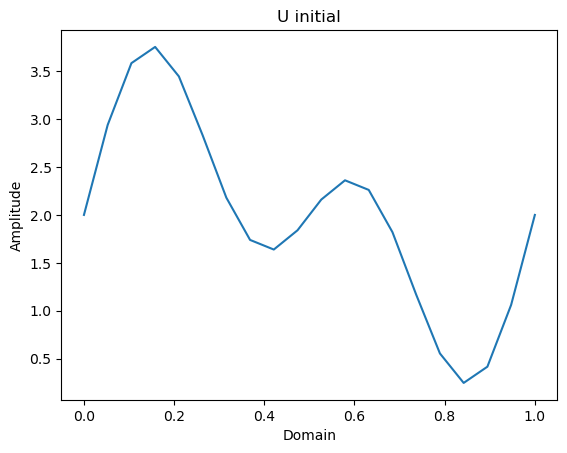

In [36]:
plt.plot(x,u_0)
plt.title('U initial')
plt.xlabel('Domain')
plt.ylabel('Amplitude')

In [37]:
ntotal=100 #final time step
delta_x=1/20
delta_t=delta_x/10 
nx =20 #number of grid points

In [38]:
# Initialize array to store results for each iteration
u_results = np.zeros((ntotal, nx))  # Array to store results for each timestep
for n in range(ntotal):
    if n==0:
        u=np.copy(u_0)
    # Initialize u_next for the current iteration
    u_next = np.zeros_like(u_0)        
    for i in range(1, nx - 1):
        # Compute spatial differences using central differences
        d_q_dx = (u[i + 1] - u[i - 1]) / (2 * delta_x)
        # Update u_next for the next time step
        u_next[i] = u[i] - delta_t * u[i] * d_q_dx #need to multiply by u and not c!
        # Apply boundary conditions
    u_next[0] = u[0]  # Left boundary
    u_next[-1] = u[-1]  # Right boundary
    u = np.copy(u_next)
    u_results[n,:] =u

Text(0, 0.5, 'Amplitude')

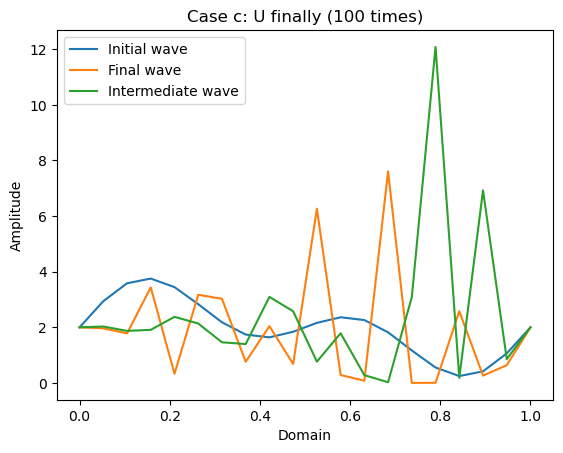

In [51]:
plt.plot(x,u_0)
plt.plot(x,u_next)
plt.plot(x,u_results[50])
plt.legend(['Initial wave', 'Final wave','Intermediate wave'])
plt.title('Case c: U finally (100 times)')
plt.xlabel('Domain')
plt.ylabel('Amplitude')

Here, the instability develops rather quickly by timestep 20, and peaks at timestep 50. It then subsides a bit after that timestep.

In [122]:
for i in range(0,len(u_results),5):
    print(u_results[i])

[2.         2.70620721 3.43775498 3.77888488 3.60399729 3.0111555
 2.29917282 1.78620649 1.63052509 1.79193605 2.10379916 2.34932377
 2.32204721 1.91939728 1.24190415 0.58019269 0.24876819 0.39943949
 0.9770702  2.        ]
[2.         2.06355316 2.51144987 3.13038019 3.77083642 3.98582707
 3.28382117 2.2722165  1.72166665 1.6441483  1.82717874 2.12190419
 2.40832893 2.42655537 1.77525137 0.77198238 0.26615521 0.3450088
 0.63947295 2.        ]
[2.         1.91847973 2.05181712 2.36330507 2.75380872 3.54151449
 4.46963776 3.62957635 2.23441132 1.69375406 1.66895082 1.84326579
 2.10486689 2.55644933 2.62192751 1.19156996 0.30681671 0.32298185
 0.41398831 2.        ]
[2.         1.92966247 1.898084   2.06881578 2.27665392 2.31172126
 3.08878197 4.98650434 4.05414151 2.2364862  1.69567196 1.70540494
 1.80974659 1.99488441 3.22148328 2.19217854 0.41088549 0.32215251
 0.2670503  2.        ]
[2.         1.98778706 1.87762673 1.89471847 2.15890453 2.19909172
 1.84456713 2.49974878 5.34959047 4

### d) u(x,0) = 3 + sin(2pix) + sin(4pix) + sin(6pix) (there are 3 waves)
Run to 100 time steps, print u at every 5 time steps, and plot u initially and finally to illustrate the development of the instability.

In [53]:
x=np.linspace(0,1,20)
u_0=3+np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + np.sin(6*np.pi*x)
u_0

array([3.        , 4.77607866, 5.49938631, 4.9175344 , 3.70962375,
       2.86258964, 2.85534995, 3.35335213, 3.63536541, 3.31584251,
       2.68415749, 2.36463459, 2.64664787, 3.14465005, 3.13741036,
       2.29037625, 1.0824656 , 0.50061369, 1.22392134, 3.        ])

Text(0, 0.5, 'Amplitude')

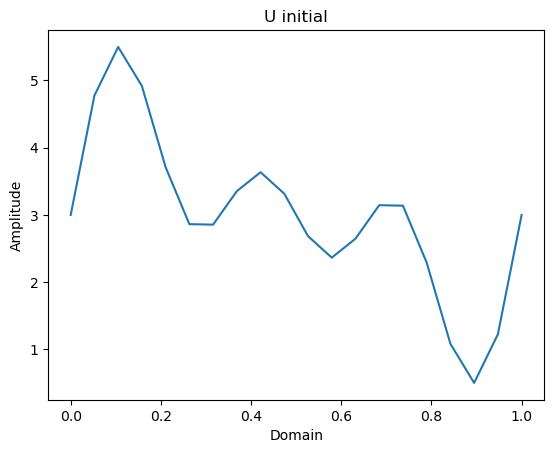

In [54]:
plt.plot(x,u_0)
plt.title('U initial')
plt.xlabel('Domain')
plt.ylabel('Amplitude')

In [55]:
ntotal=100 #final time step
delta_x=1/20
delta_t=delta_x/10 
nx =20 #number of grid points

In [56]:
# Initialize array to store results for each iteration
u_results = np.zeros((ntotal, nx))  # Array to store results for each timestep
for n in range(ntotal):
    if n==0:
        u=np.copy(u_0)
    # Initialize u_next for the current iteration
    u_next = np.zeros_like(u_0)        
    for i in range(1, nx - 1):
        # Compute spatial differences using central differences
        d_q_dx = (u[i + 1] - u[i - 1]) / (2 * delta_x)
        # Update u_next for the next time step
        u_next[i] = u[i] - delta_t * u[i] * d_q_dx #need to multiply by u and not c!
        # Apply boundary conditions
    u_next[0] = u[0]  # Left boundary
    u_next[-1] = u[-1]  # Right boundary
    u = np.copy(u_next)
    u_results[n,:]=u

Text(0, 0.5, 'Amplitude')

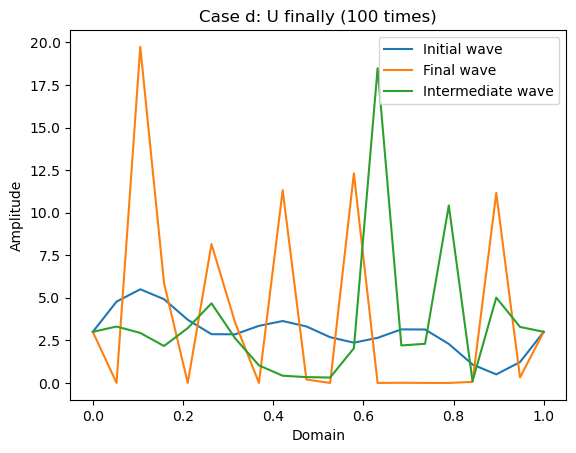

In [74]:
plt.plot(x,u_0)
plt.plot(x,u_next)
plt.plot(x,u_results[30])
plt.legend(['Initial wave', 'Final wave','Intermediate wave'])
plt.title('Case d: U finally (100 times)')
plt.xlabel('Domain')
plt.ylabel('Amplitude')

The results here are similar to part c), and the instability grows rather quickly. 

In [145]:
for i in range(0,len(u_results),5):
    print(u_results[i])

[3.         4.17921538 5.46049032 5.35759534 4.09077734 2.9848614
 2.78528501 3.2225688  3.64218347 3.4735453  2.81181708 2.36906942
 2.54342656 3.06748624 3.27142074 2.52570609 1.17933343 0.49707296
 1.07096873 3.        ]
[3.         2.79184389 3.05520108 4.47315511 6.55288303 5.19875009
 3.2355122  2.74000285 3.03935917 3.73406717 3.75358657 2.84895731
 2.34503209 2.43201716 3.04787785 3.91432815 2.15730809 0.58278121
 0.5518001  3.        ]
[3.         2.95705436 2.74830027 2.26989308 2.61781056 6.15095909
 7.28985986 4.04780548 2.7385873  2.78668522 3.82441802 4.02575399
 2.96720799 2.38856717 1.96562845 3.47804068 4.62536193 1.06806751
 0.30103802 3.        ]
[3.         3.00235329 3.17627706 2.83397288 1.8664336  1.45125204
 3.18645128 8.89233847 6.35406251 2.92054517 2.56507913 3.82883335
 4.19246056 3.51684012 2.05391936 1.30028311 5.57743908 3.37714272
 0.21661651 3.        ]
[ 3.          2.88204232  2.99038126  3.58723873  2.85259696  1.61070071
  1.03193078  1.00052298  5.